# This notebook is made for a part of Coventry University's coursework.
Dataset is accessible on https://www.kaggle.com/sobhanmoosavi/us-accidents

## This is part three of the coursework - Machine Learning

Produced by Sunggu Choi

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [107]:
#Load Pre-processed dataset
df = pd.read_csv('df_FL_two.csv')
df.drop(['Unnamed: 0', 'ID','Time','Start_Lat','Start_Lng','County','State','City'], axis=1, inplace=True)

In [108]:
#Rename the columns for process
df2 = df.rename(columns = {"Temperature(F)":"Temperature_Fe","Wind_Chill(F)":"Wind_Chill_Fe","Humidity(%)":"Humidity","Pressure(in)":"Pressure_in","Visibility(mi)":"Visibility_mi","Precipitation(in)":"Precipitation_in"})
df2

,Severity,Temperature_Fe,Wind_Chill_Fe,Humidity,Pressure_in,Visibility_mi,Precipitation_in,Amenity,Bump,Crossing,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,80.6,0.0,70.0,29.94,10.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day
1,3,80.6,0.0,65.0,29.94,10.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day
2,2,80.1,0.0,71.0,29.96,10.0,0.0,False,False,False,...,False,False,False,False,True,False,Day,Day,Day,Day
3,3,80.1,0.0,69.0,29.97,10.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2,79.0,0.0,69.0,29.98,10.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257997,2,86.0,86.0,70.0,29.93,10.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day
257998,3,84.0,84.0,89.0,30.00,2.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day
257999,4,0.0,0.0,0.0,0.00,0.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day
258000,4,83.0,83.0,74.0,29.85,10.0,0.0,False,False,False,...,False,False,False,False,False,False,Day,Day,Day,Day


In [109]:
#Repleacing string to number 
df3 = df2.replace(regex=['Day'], value='0')
df4 = df3.replace(regex=['Night'], value='1')
df4

,Severity,Temperature_Fe,Wind_Chill_Fe,Humidity,Pressure_in,Visibility_mi,Precipitation_in,Amenity,Bump,Crossing,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,80.6,0.0,70.0,29.94,10.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0
1,3,80.6,0.0,65.0,29.94,10.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0
2,2,80.1,0.0,71.0,29.96,10.0,0.0,False,False,False,...,False,False,False,False,True,False,0,0,0,0
3,3,80.1,0.0,69.0,29.97,10.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0
4,2,79.0,0.0,69.0,29.98,10.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257997,2,86.0,86.0,70.0,29.93,10.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0
257998,3,84.0,84.0,89.0,30.00,2.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0
257999,4,0.0,0.0,0.0,0.00,0.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0
258000,4,83.0,83.0,74.0,29.85,10.0,0.0,False,False,False,...,False,False,False,False,False,False,0,0,0,0


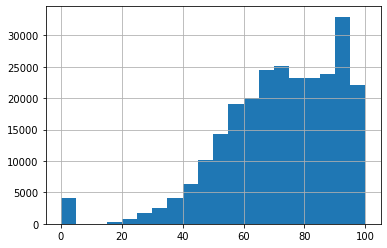

In [110]:
df4.Humidity.hist(bins=20)

In [111]:
train_dataset = df4.sample(frac=0.8, random_state=0)
test_dataset = df4.drop(train_dataset.index)

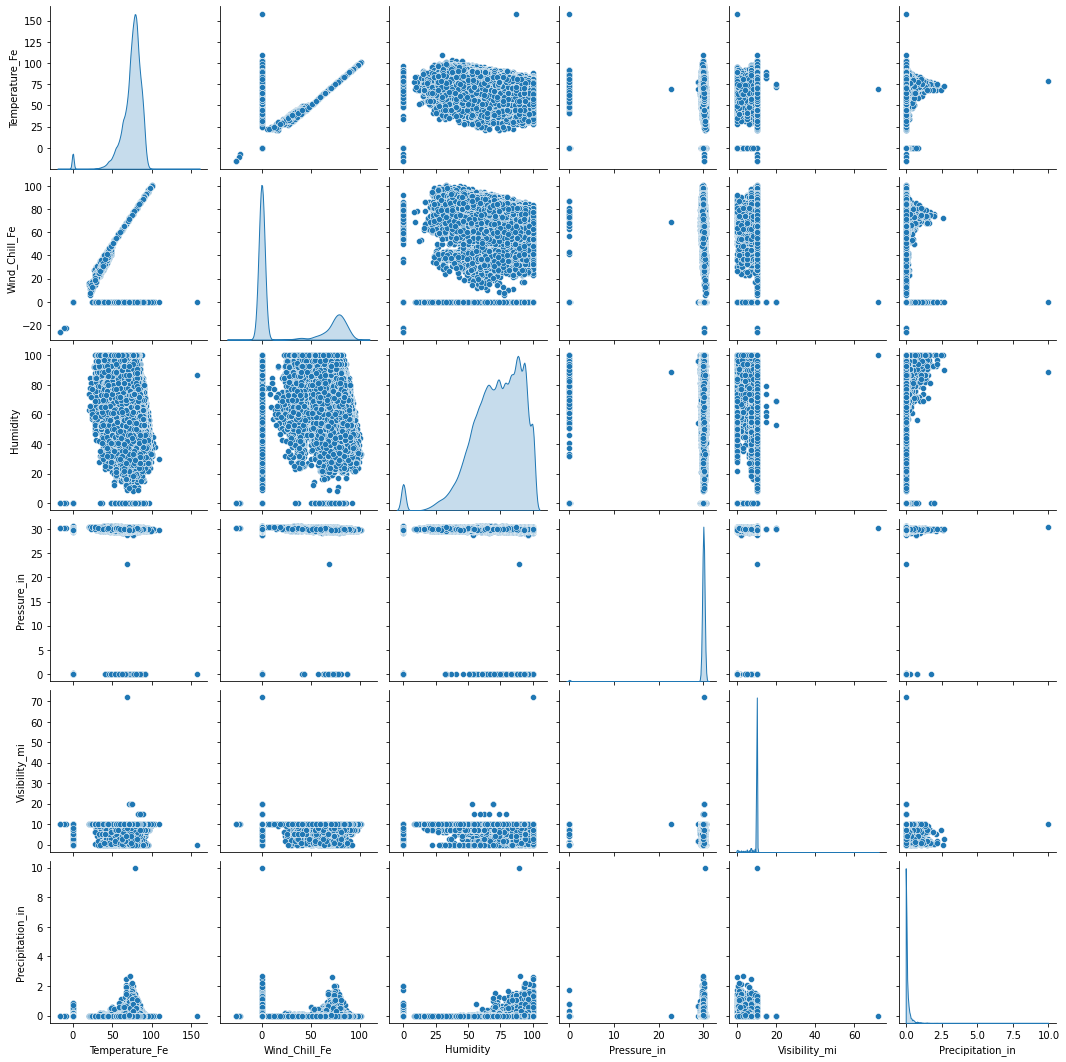

In [112]:
sns.pairplot(train_dataset[['Temperature_Fe', 'Wind_Chill_Fe', 'Humidity','Pressure_in','Visibility_mi','Precipitation_in']], diag_kind='kde')

In [113]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Severity,206402.0,2.368998,0.570020,1.0,2.00,2.00,3.00,4.00
Temperature_Fe,206402.0,74.294665,13.706096,-16.1,69.80,77.00,82.40,158.00
Wind_Chill_Fe,206402.0,24.151630,35.634952,-26.2,0.00,0.00,69.00,101.00
Humidity,206402.0,71.919555,19.585467,0.0,60.00,74.00,87.00,100.00
Pressure_in,206402.0,29.807904,2.644485,0.0,29.96,30.04,30.12,30.63
Visibility_mi,206402.0,9.321642,2.046481,0.0,10.00,10.00,10.00,72.00
Precipitation_in,206402.0,0.008782,0.067085,0.0,0.00,0.00,0.00,9.98


In [114]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Severity')
test_labels = test_features.pop('Severity')

In [115]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Severity,2.368998,0.570020
Temperature_Fe,74.294665,13.706096
Wind_Chill_Fe,24.151630,35.634952
Humidity,71.919555,19.585467
Pressure_in,29.807904,2.644485
Visibility_mi,9.321642,2.046481
Precipitation_in,0.008782,0.067085


In [116]:
normalizer = preprocessing.Normalization()

In [117]:
normalizer.adapt(np.array(train_features))

TypeError: unsupported operand type(s) for -: 'str' and 'float'